## GROUP 4 : CUSTOMER CHURN ANALYSIS

Student Names: 
* Anne Gitonga
* Cynthia Karuga
* Mitchelle Okubasu
* Okuda Pascal


Student Pace: 
* Part-time


Instructors: 
* Samwel Jane
* Stella Waithera
* Everlyn Asiko

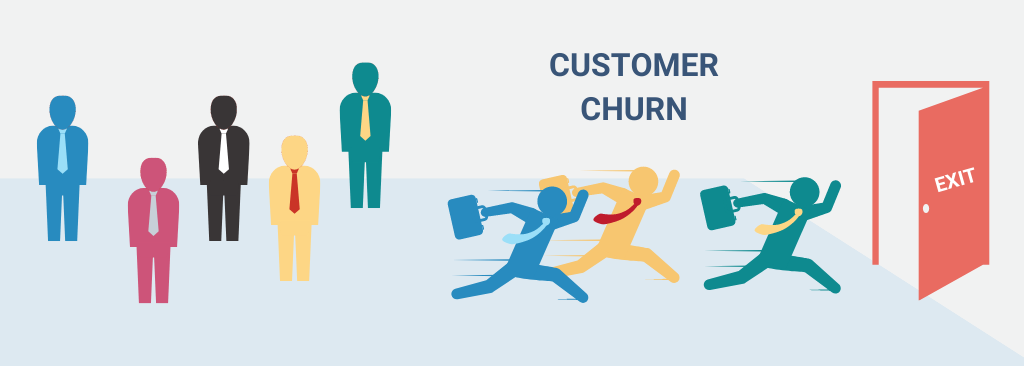

**Problem Statement:**

Build a classifier model to predict whether a customer will ("soon") stop doing business with SyriaTel Company.

**Project Overview:**

This project analyzes SyriaTel data and builds models that predict whether a customer will churn or not.

**Business Understanding:**

Customers are important in any business or organization. The more the customers, the more the organization makes in profit. From customers we can get two groups of customers, New customers and existing customers. Existing customers are crucial to any business as getting a new customer is not easy.Studies have shown that acquiring new customers is 6 to 7 times more expensive than retaining an old one. Some of the benefits of existing customers are:
 - They cost less than new customer acquisition.
 - Refferals - Existing customers can refer family members and friends thus increasing the company's customers.
 - Increases company profit
 - Existing customers are easier to convince to buy more products from you than new customers. 
 
Thus retaining customers is crucial for a business but businesses sometimes lose customers and this is referred to as Customer churn.
Customer churn is the percentage of customers who stopped purchasing a business's or organization's products or services during a certain period of time. Customer churn rate can be calculated by dividing the number of customers lost during the period (this could be a week, a month etc) by the number of customers at the beginning of that period. 
Customers churn due to various reasons which may include:

 - Poor customer service
 - Competitors offering better services or products
 - Free trials
 - Complexity in product
 - High cost of product
 - Products no longer serving them
 - Customer short-term goal already achieved



**Stakeholders:**

**SyriaTel company:**
A telecommunication company in Syria that is looking for help in increasing its profits by retaining its customers. That is, reducing the rate of customer churn. They are also in need of a model that predicts whether a customer (new or existing) will churn soon.

**Data Understanding:**

In this project we will make use of "bigml_59c28831336c6604c800002a.csv" data from SyriaTel company which was obtained from Kaggle.The dataset includes how many minutes they spend talking, how many calls they make and how much they are charged during day, evening and night periods.
To get the monthly customer churn rate = (Customers lost during the month / Total customers at the beginning of the month) * 100

**Objectives:**
 * To find out the **features** thats are most important to our target variable
 * To come up with a predictive model that predicts whether a customer will churn soon
 * Come up with recommendations for customers predicted to churn.


In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [4]:
#loading the dataset
df = pd.read_csv("/content/BIGML_~1.CSV")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
#information on the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

There are no null values in the data. The data contains 21 columns and 3333 rows.
What do the columns contain?
 - state : Different states of the customers
 - account length: number of days a customer's account has been active
 - area code : location of the customer
 - phone number : customer's phone number
 - international plan : whether the customer uses the international plan or not
 - voice mail plan : whether the customer has subscribed to vmail plan or not
 - number vmail messages : if customer has a vmail plan, how many vmail messages do they get
 - total day minutes : total number of call minutes used during the day
 - total day calls : total number of calls made during the day
 - total day charge : total charge on day calls
 - total eve minutes : total number of call minutes used in the evening
 - total eve calls : total calls made in the evening
 - total eve charge : total charge on evening calls
 - total night minutes: Total number of call minutes used at night
 - total night calls : Total number of night calls
 - total night charge : Total charge on night calls
 - total intl minutes : total international minutes used
 - total intl calls : total number of international calls made
 - total intl charge : total charge on international calls
 - customer service calls : number of calls made to customer service
 - churn : boolean on whether the customer left or not
 

In [6]:
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [7]:
# Categorical and numerical variables
cat_vars = []
num_vars = []

for col in df.columns:
    if df[col].dtype == 'object':
        cat_vars.append(col)
    else:
        num_vars.append(col)
num_vars.pop(-1)
cat_vars.pop(1)
print("-------------------------------------------------------------------------------------------------------------------")
print('Categorical variables:', cat_vars)
print("-------------------------------------------------------------------------------------------------------------------")
print('Numerical variables:', num_vars)
print("-------------------------------------------------------------------------------------------------------------------")

-------------------------------------------------------------------------------------------------------------------
Categorical variables: ['state', 'international plan', 'voice mail plan']
-------------------------------------------------------------------------------------------------------------------
Numerical variables: ['account length', 'area code', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']
-------------------------------------------------------------------------------------------------------------------


* Describe the numerical data 

In [8]:
# Describe the numerical data
df[num_vars].describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [9]:
df.shape

(3333, 21)

### Target variable distribution

In [10]:
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

Text(0.5, 1.0, 'Distribution of non-churn and churn customers')

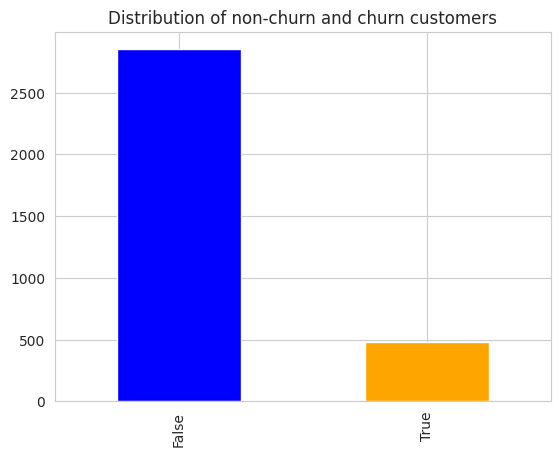

In [11]:
#count visualization
df['churn'].value_counts().plot(kind='bar',color=['blue', 'orange']).set_title('Distribution of non-churn and churn customers')

In [12]:
print(f"From the graph above, it shows we have an imbalanced issue as there are more unchurned customers than churned one.")

From the graph above, it shows we have an imbalanced issue as there are more unchurned customers than churned one.


**Univariate Analysis:**

 * Numerical dataset

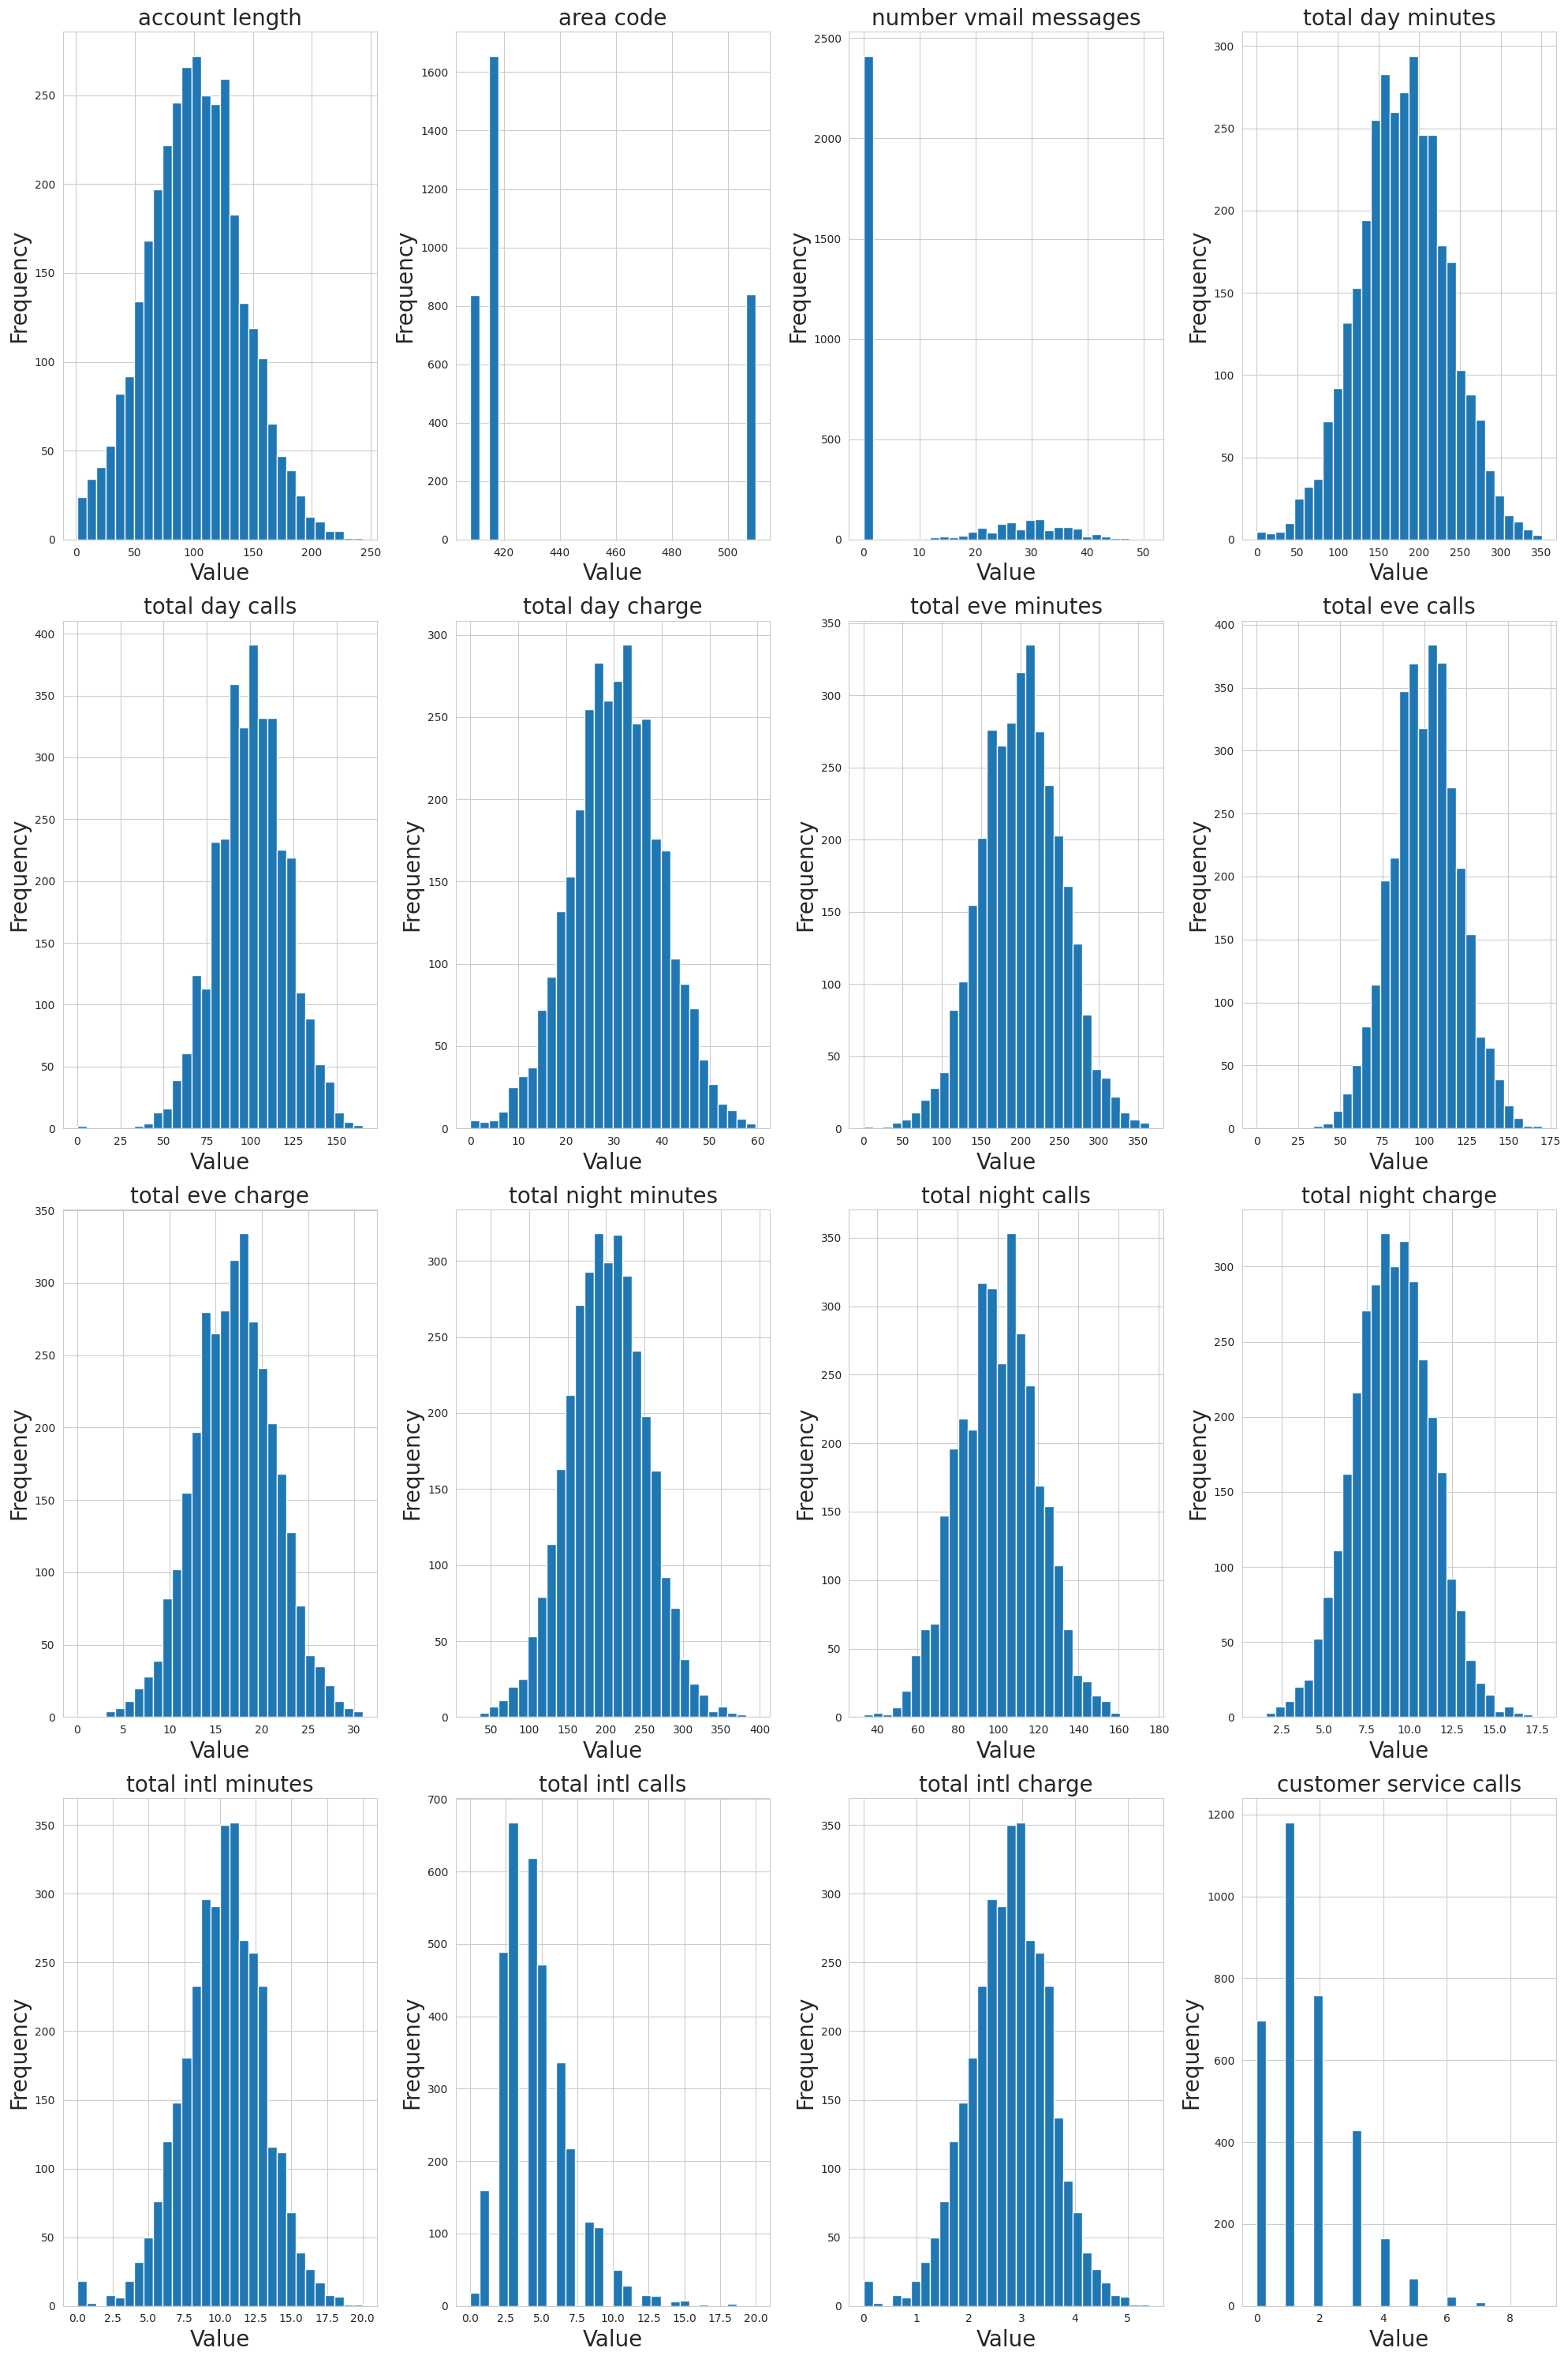

In [13]:
# Create subplots for each numerical variable
num_plots = len(num_vars)
num_rows = 4
num_cols = 4
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 30))

for i, var in enumerate(num_vars):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].hist(df[var], bins=30)
    axes[row, col].set_title(var,fontsize=20)
    axes[row, col].set_xlabel('Value',fontsize=20)
    axes[row, col].set_ylabel('Frequency',fontsize=20)

plt.tight_layout()
plt.show()

* Categorical dataset

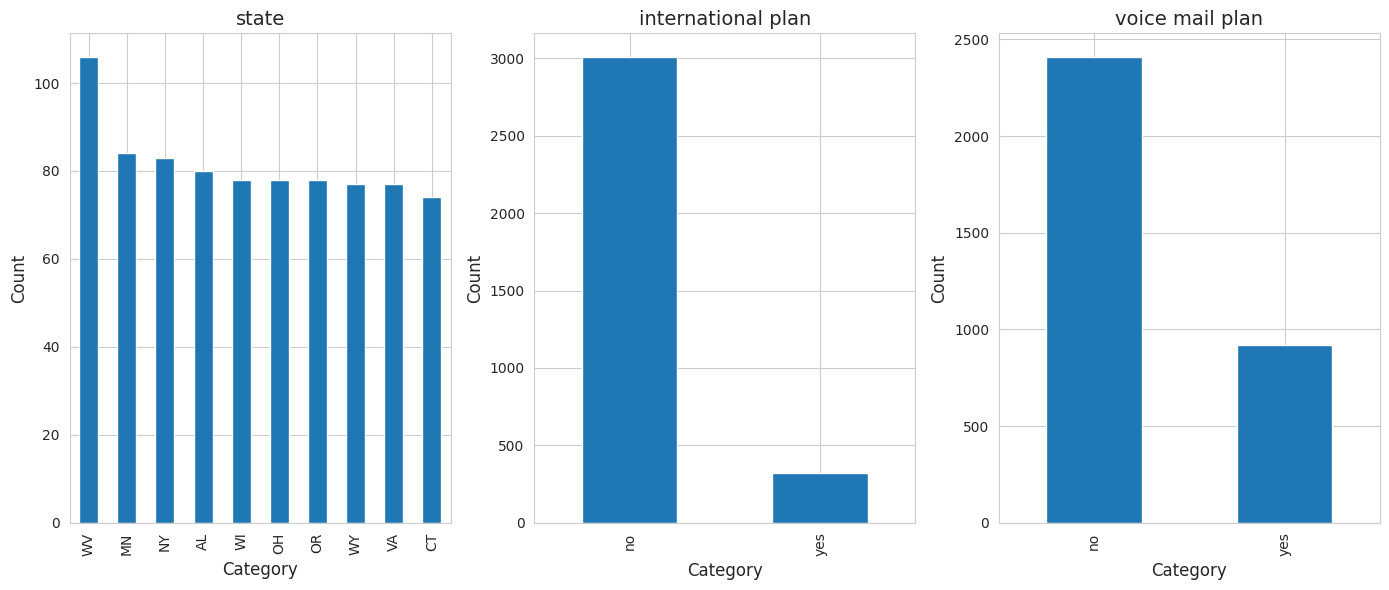

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14, 6))

for i, cat_var in enumerate(cat_vars):
    top_ten_cats = df[cat_var].value_counts().nlargest(10)
    top_ten_cats.plot(kind='bar', ax=ax[i])
    ax[i].set_title(cat_var, fontsize=14)
    ax[i].set_xlabel('Category', fontsize=12)
    ax[i].set_ylabel('Count', fontsize=12)
    
plt.tight_layout()
plt.show()


**Bivariate Analysis:**

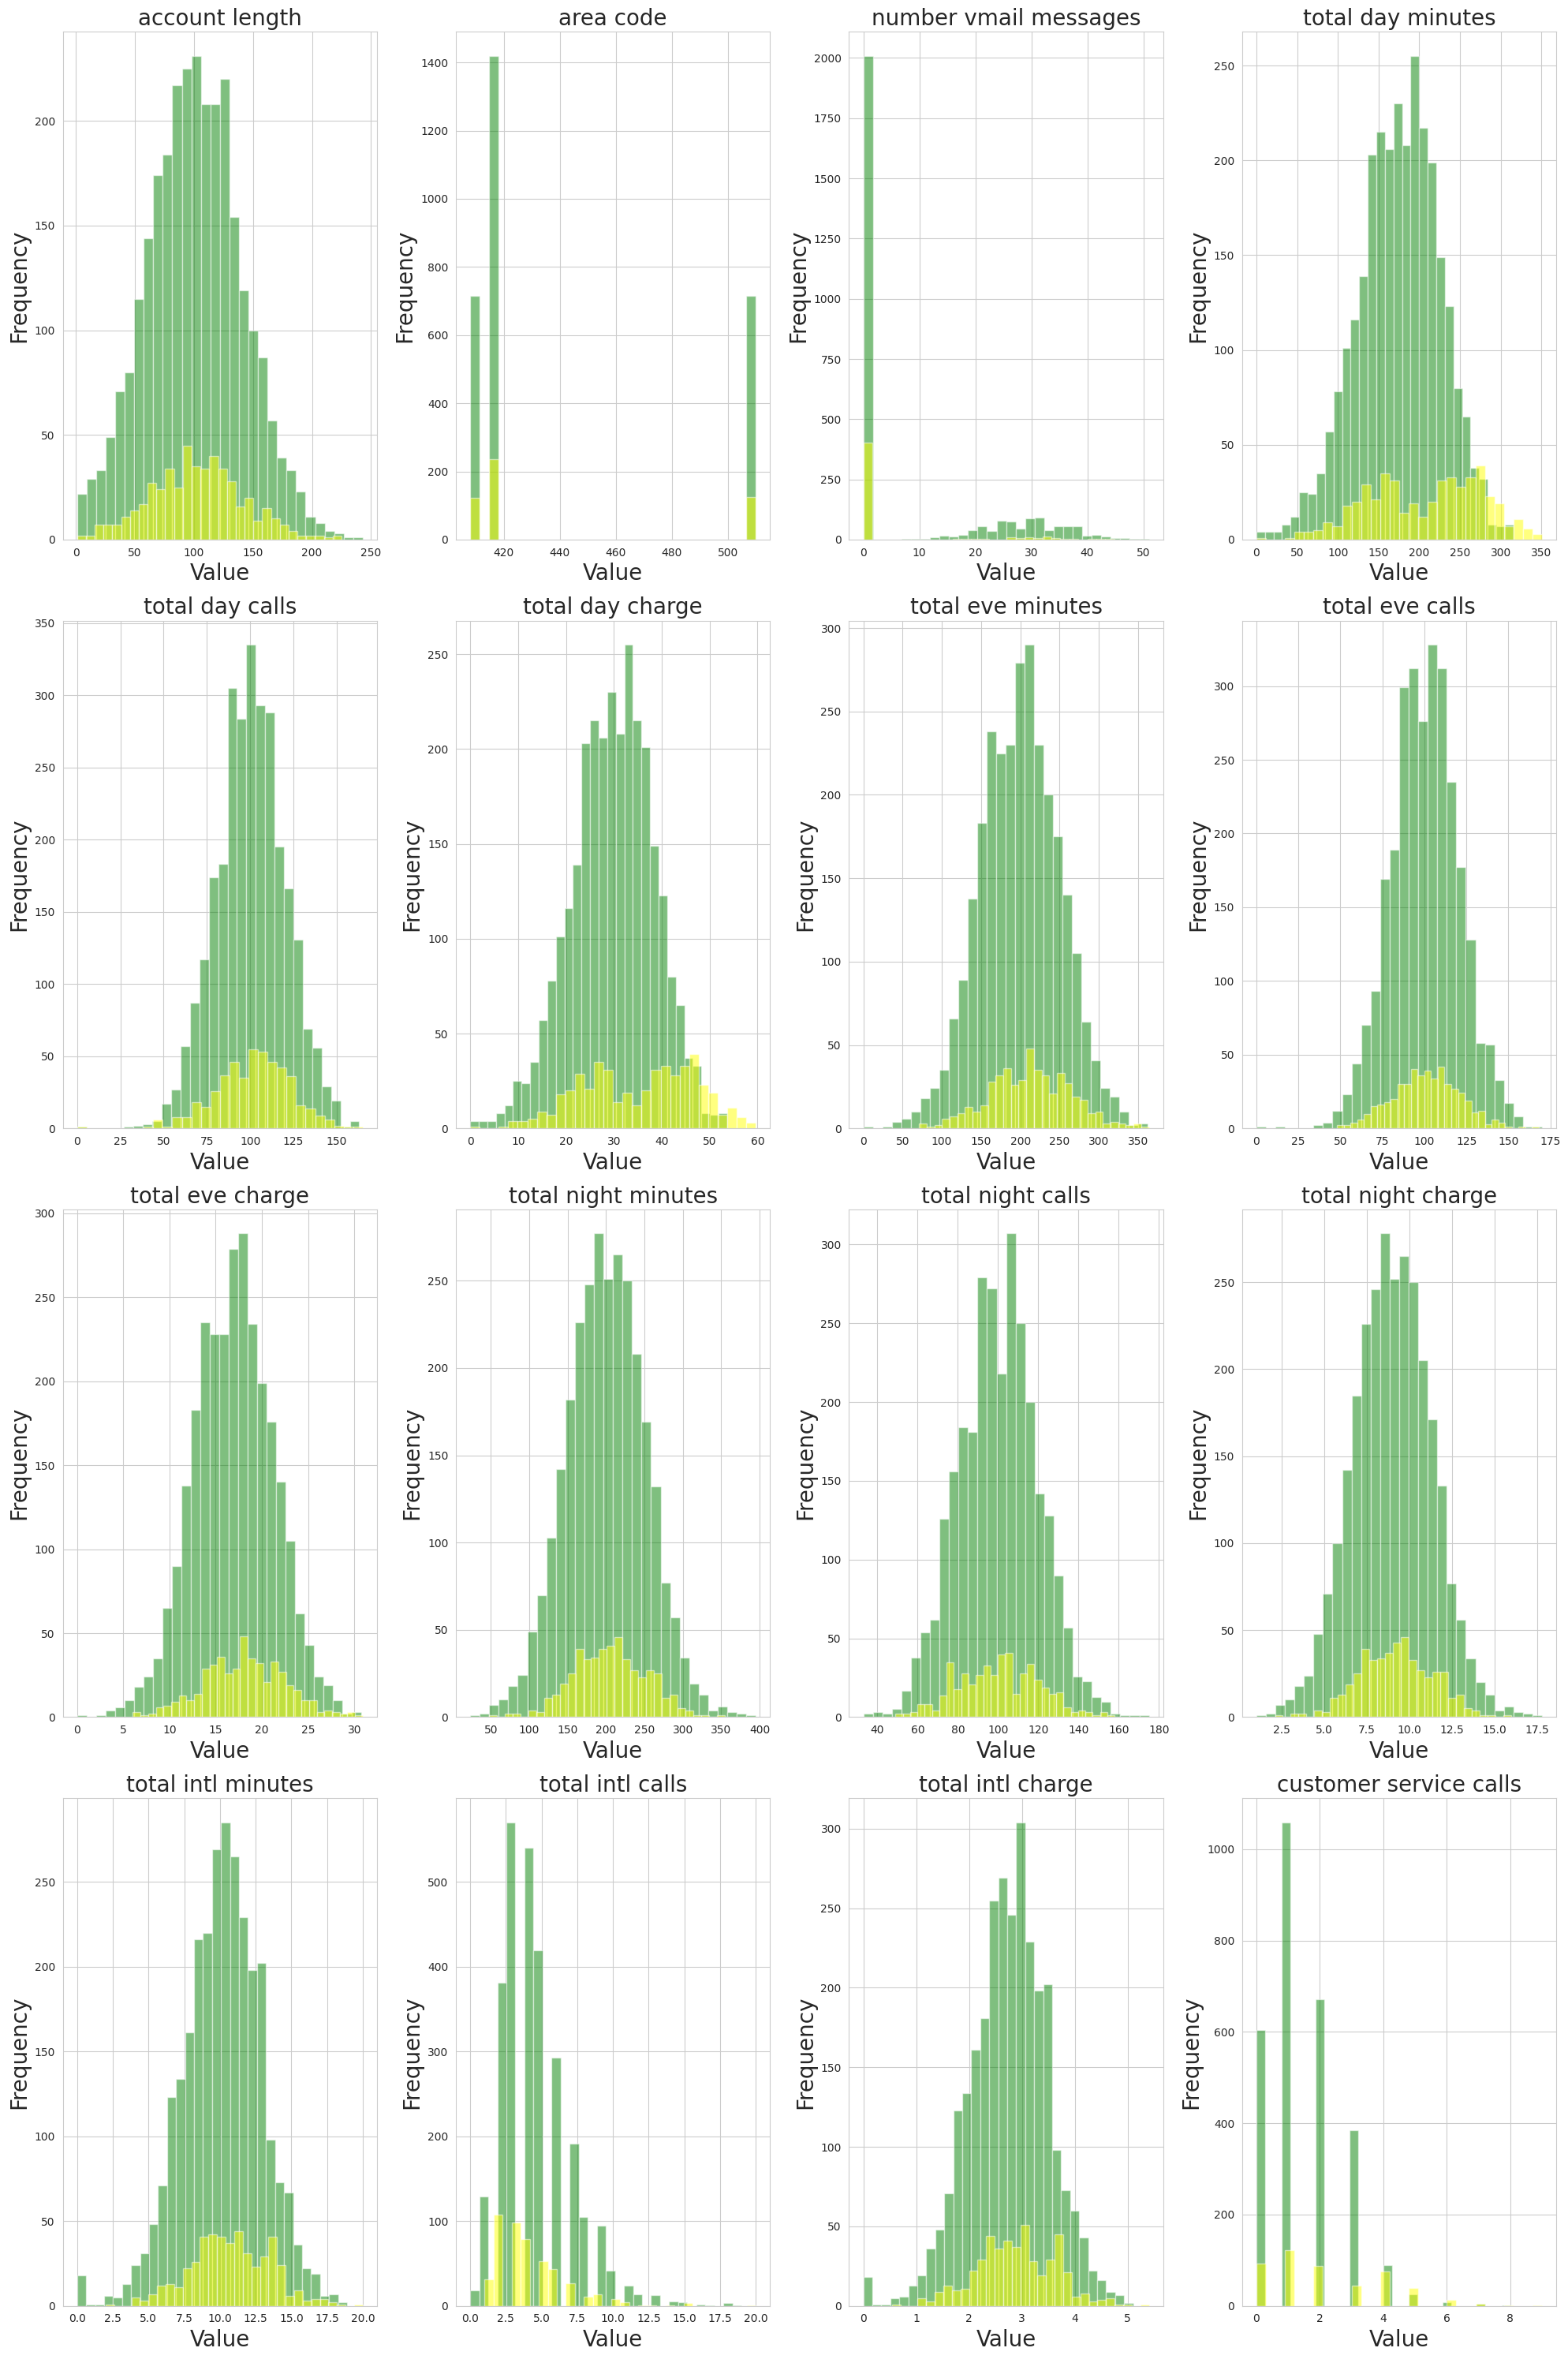

In [15]:
#scatter plot of churn variables by continuous variables
# Create subplots for each numerical variable
num_plots = len(num_vars)
num_rows = 4
num_cols = 4
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 30))

# Plot histograms for non-churned customers
for i, var in enumerate(num_vars):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].hist(df[df.churn == 0][var], bins=30, color="green", alpha=0.5)
    axes[row, col].set_title(var,fontsize=20)
    axes[row, col].set_xlabel('Value',fontsize=20)
    axes[row, col].set_ylabel('Frequency',fontsize=20)

# subplots for each numerical variable
for i, var in enumerate(num_vars):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].hist(df[df.churn == 1][var], bins=30, color="yellow", alpha=0.5)
    axes[row, col].set_title(var,fontsize=20)
    axes[row, col].set_xlabel('Value',fontsize=20)
    axes[row, col].set_ylabel('Frequency',fontsize=20)

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'churned- voice mail plan')

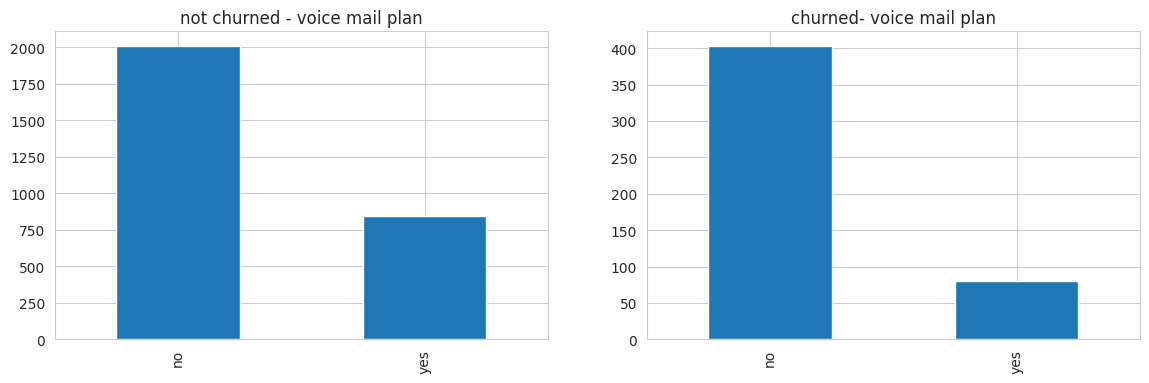

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
df[df.churn == 0][cat_var].value_counts().plot(kind = 'bar', ax=ax[0]).set_title('not churned - voice mail plan')
df[df.churn == 1][cat_var].value_counts().plot(kind = 'bar', ax=ax[1]).set_title('churned- voice mail plan')

In [ ]:
S=df['state'].groupby(df['state']).value_counts().sort_values(ascending=False)
print(S)

state  state
WV     WV       106
MN     MN        84
NY     NY        83
AL     AL        80
OR     OR        78
WI     WI        78
OH     OH        78
VA     VA        77
WY     WY        77
CT     CT        74
VT     VT        73
ID     ID        73
MI     MI        73
UT     UT        72
TX     TX        72
IN     IN        71
KS     KS        70
MD     MD        70
NJ     NJ        68
NC     NC        68
MT     MT        68
CO     CO        66
NV     NV        66
WA     WA        66
RI     RI        65
MS     MS        65
MA     MA        65
AZ     AZ        64
MO     MO        63
FL     FL        63
ND     ND        62
ME     ME        62
NM     NM        62
OK     OK        61
NE     NE        61
DE     DE        61
SC     SC        60
SD     SD        60
KY     KY        59
IL     IL        58
NH     NH        56
AR     AR        55
DC     DC        54
GA     GA        54
HI     HI        53
TN     TN        53
AK     AK        52
LA     LA        51
PA     PA        45
IA     

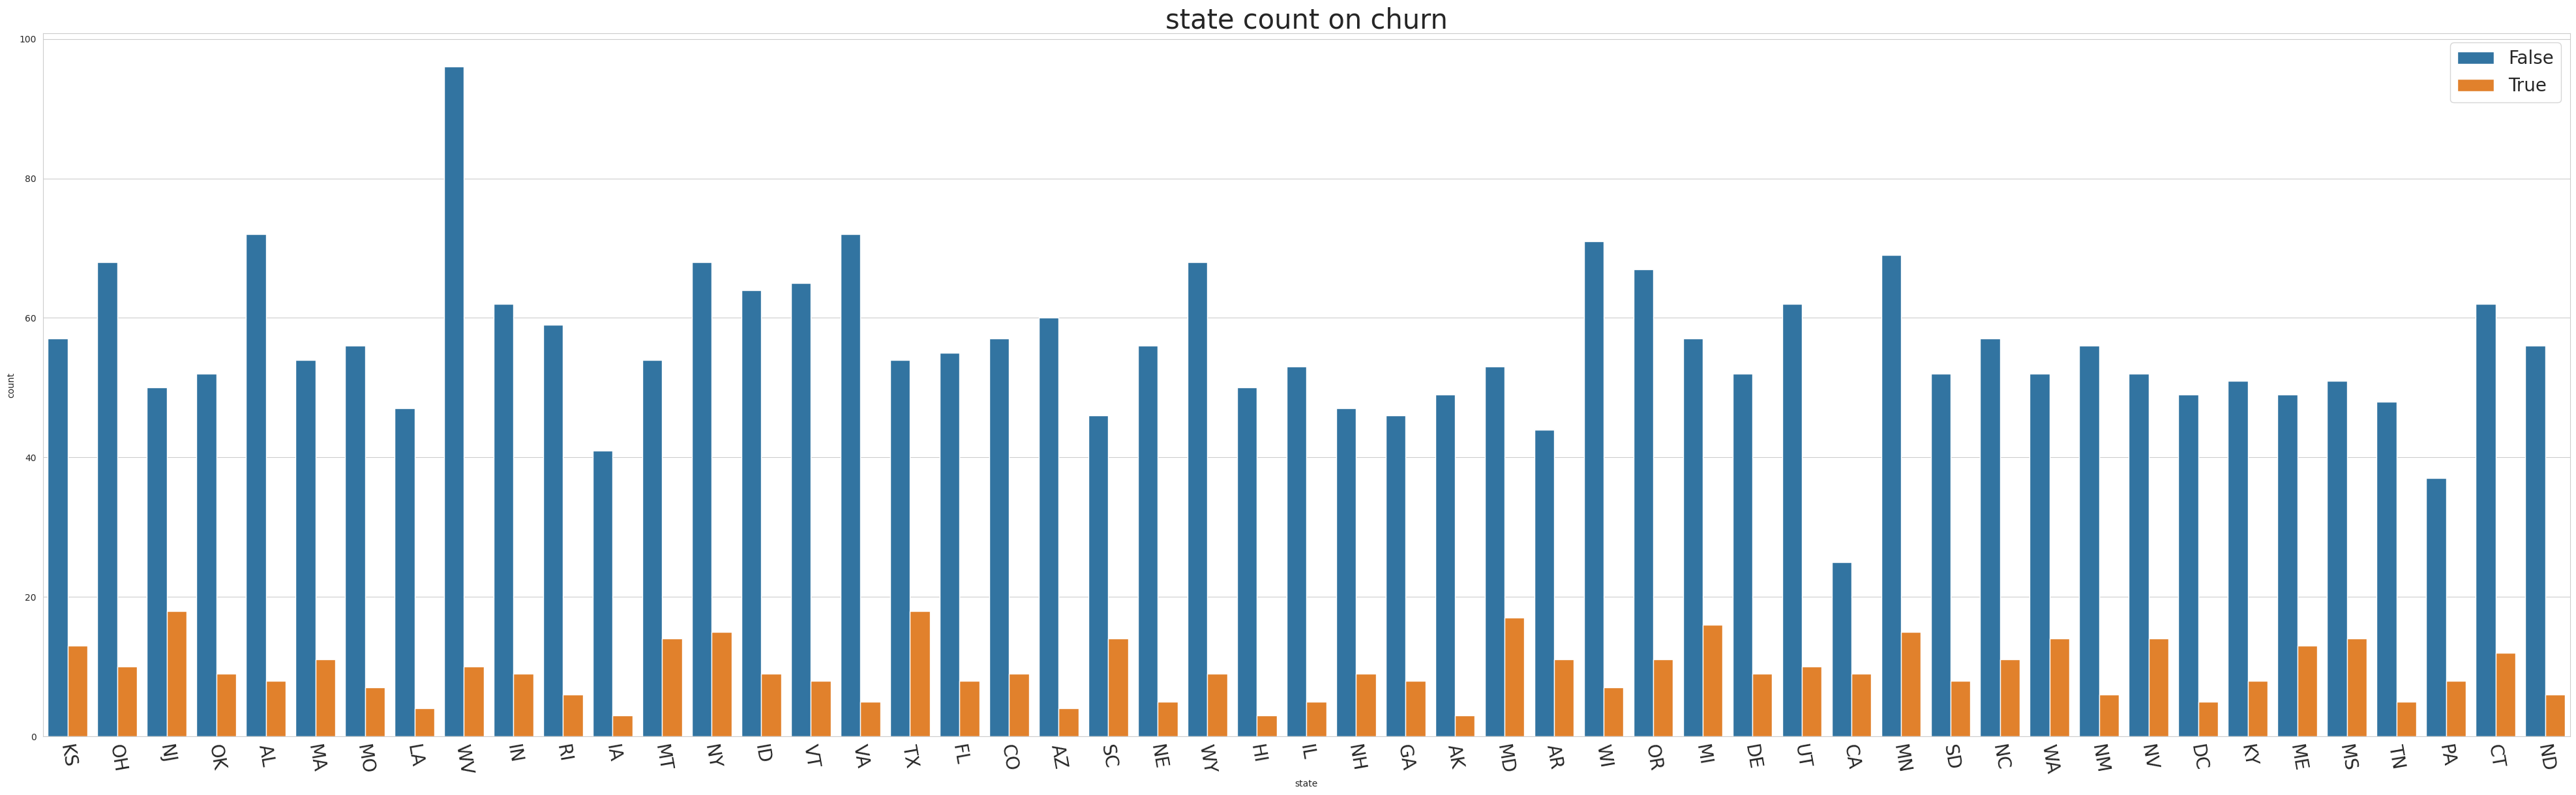

In [26]:
plt.figure(figsize=(50,14))
sns.countplot(x='state', data=df, hue='churn')
plt.title('state count on churn', fontsize=30)
plt.xticks(rotation=-80,fontsize=20)
plt.legend(fontsize=20)
plt.show()

[Text(0.5, 1.0, 'customer service calls count on churn')]

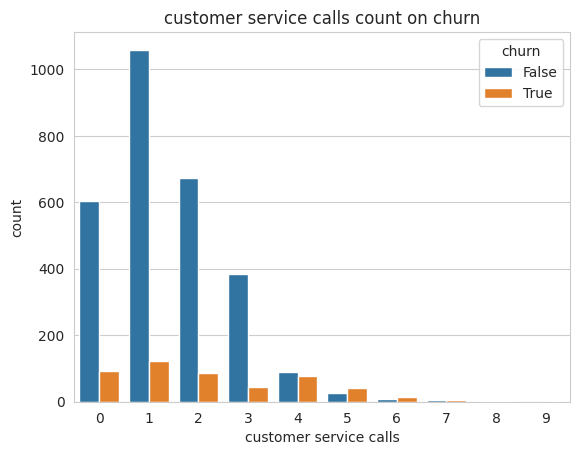

In [27]:
sns.countplot(x='customer service calls', data=df, hue='churn').set(title='customer service calls count on churn')

As the number of calls to customer service increase, number of churned customers increases

[Text(0.5, 1.0, 'customer service calls against churn')]

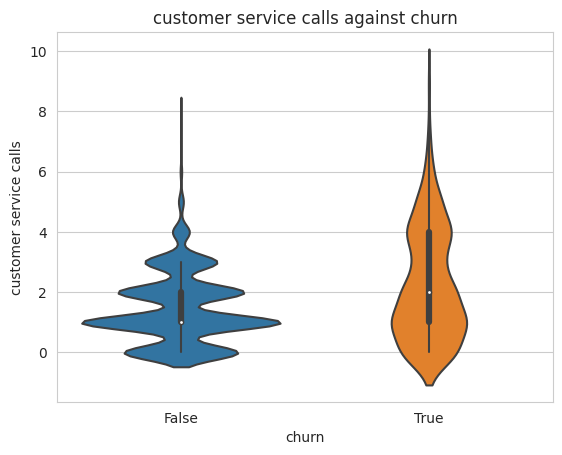

In [28]:
#customer calls and churn
sns.violinplot(x=df["churn"], y=df["customer service calls"]).set(title='customer service calls against churn')


From the violin plot, we can see that, most customer service calls were made by customers who churned. Churned customers have a high median on customer service calls compared.

In [29]:
df['account length'].value_counts()

105    43
87     42
101    40
93     40
90     39
       ..
243     1
200     1
232     1
5       1
221     1
Name: account length, Length: 212, dtype: int64

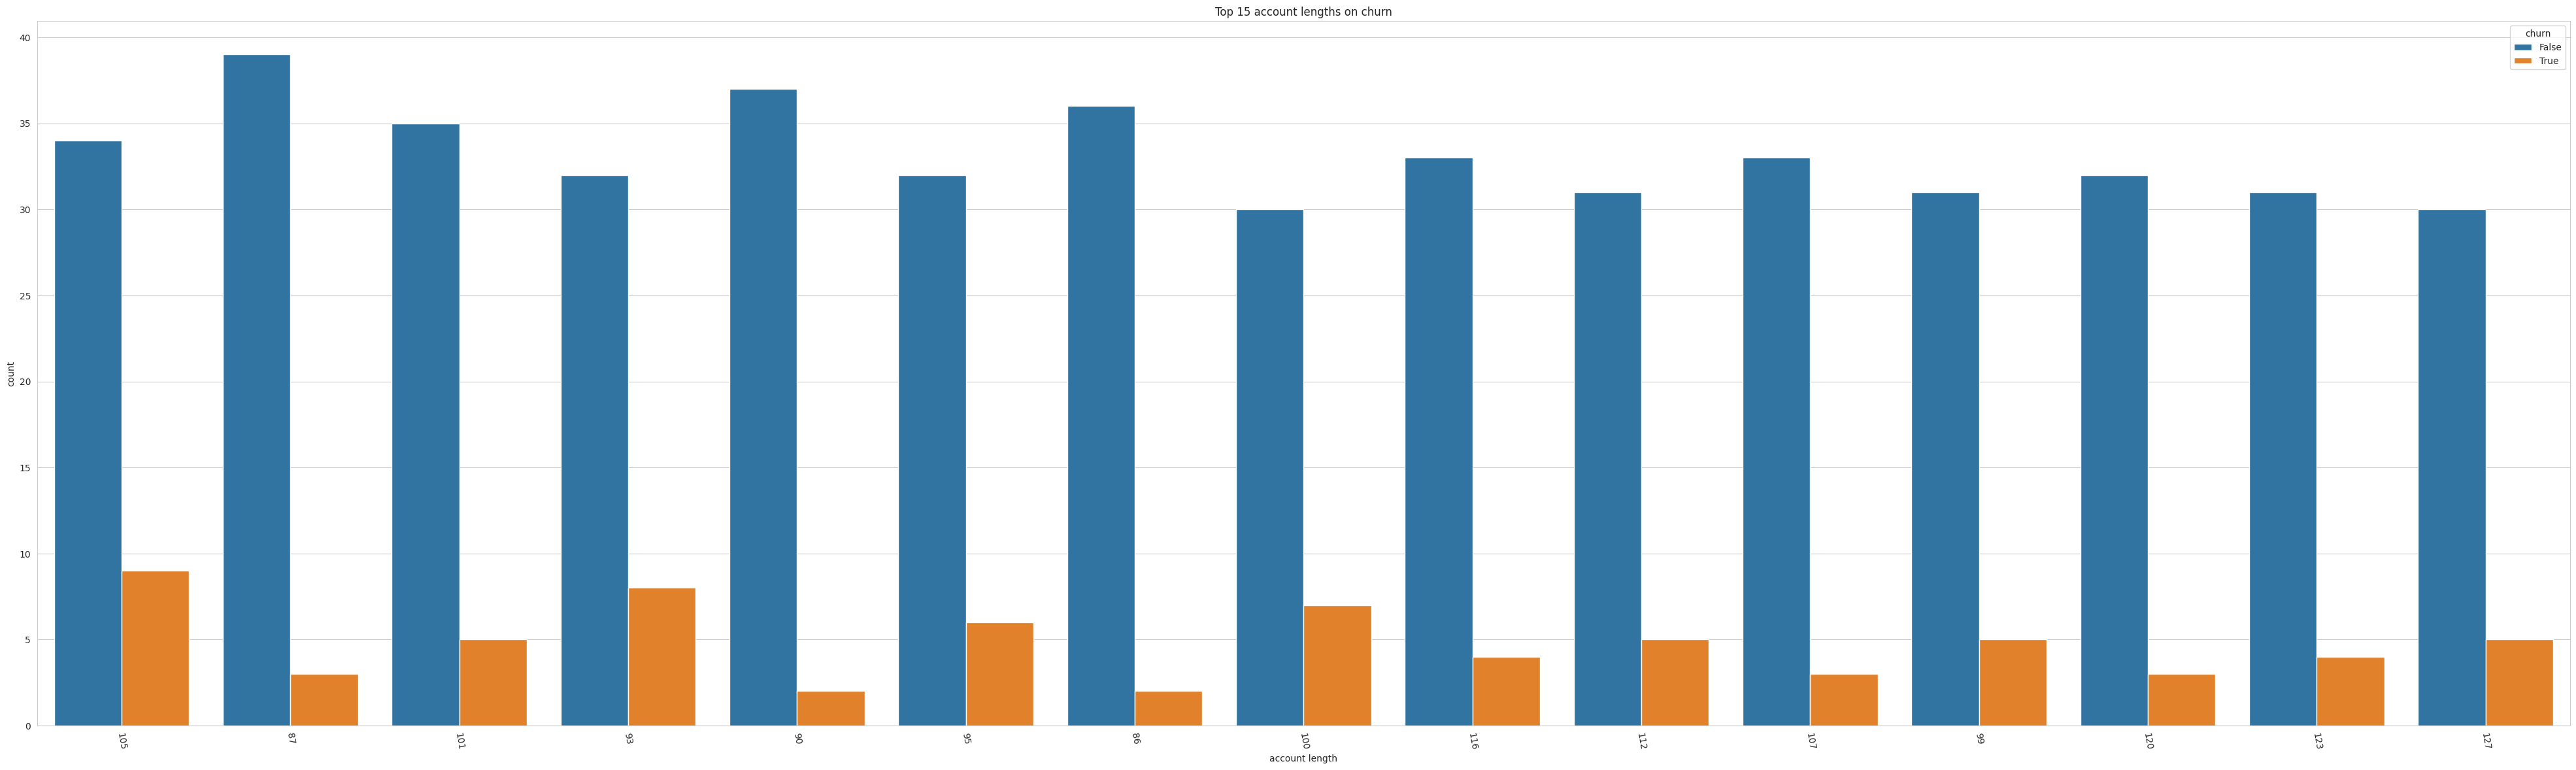

In [30]:
plt.figure(figsize=(50,14))
sns.countplot(x='account length', hue="churn", data=df, order= df['account length'].value_counts().iloc[0:15].index).set(title='Top 15 account lengths on churn')
plt.xticks(rotation=-80)
plt.show()

Area Code Analysis

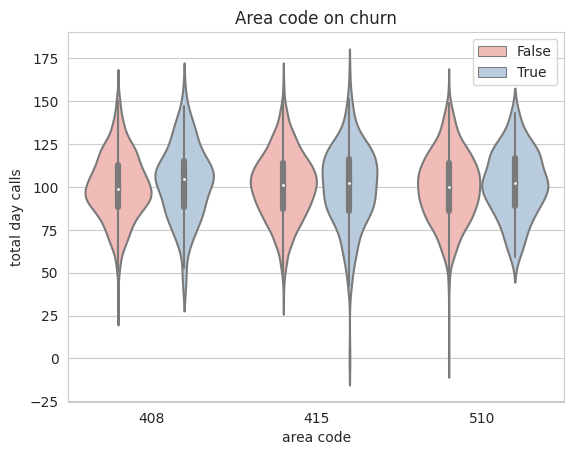

In [31]:
sns.violinplot(x="area code", y="total day calls", hue="churn", data=df, palette="Pastel1").set(title='Area code on churn')

plt.legend(loc='upper right')
plt.show()

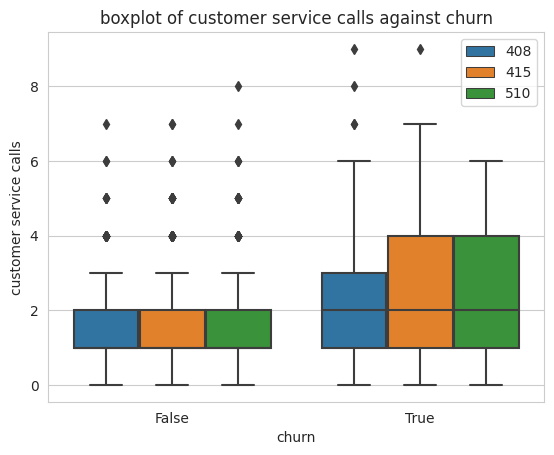

In [32]:
sns.boxplot(data=df,x='churn',y='customer service calls',hue='area code').set(title='boxplot of customer service calls against churn')
plt.legend(loc='upper right')

Most churned customers are from area code 415

[Text(0.5, 1.0, 'voice mail plan count on churn')]

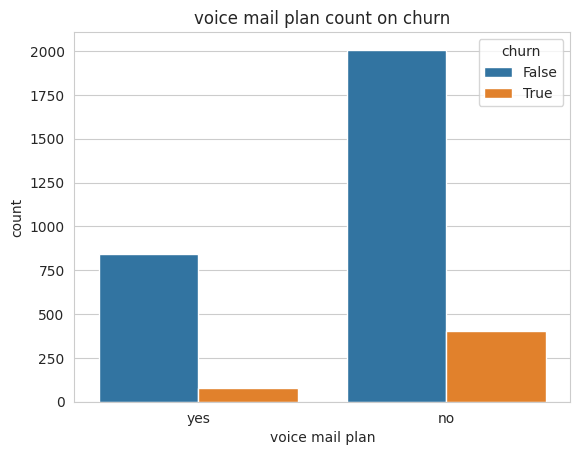

In [33]:
sns.countplot(x='voice mail plan', data=df, hue='churn').set(title='voice mail plan count on churn')

Customers without a voice mail plain churned more.

[Text(0.5, 1.0, 'international plan count on churn')]

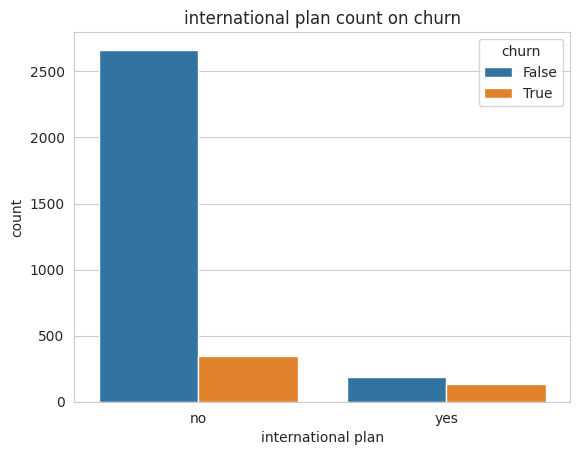

In [34]:
sns.countplot(x='international plan', data=df, hue='churn').set(title='international plan count on churn')

In [35]:
# new column - total minutes during the period
df['total calls'] = df['total day calls'] + df['total eve calls'] + df['total night calls']
# new column - total charge during the period
df['total charges'] = df['total day charge'] + df['total eve charge'] + df['total night charge'] + df['total intl charge']
#new column - total minutes during the period
df['total minutes'] = df['total day minutes'] + df['total eve minutes'] + df['total night minutes']

In [36]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total calls,total charges,total minutes
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,91,11.01,10.0,3,2.70,1,False,300,75.56,707.2
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,11.45,13.7,3,3.70,1,False,329,59.24,611.5
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,104,7.32,12.2,5,3.29,0,False,328,62.29,527.2
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,89,8.86,6.6,7,1.78,2,False,248,66.80,558.2
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,121,8.41,10.1,3,2.73,3,False,356,52.09,501.9


[Text(0.5, 1.0, 'boxplot of churn against total calls')]

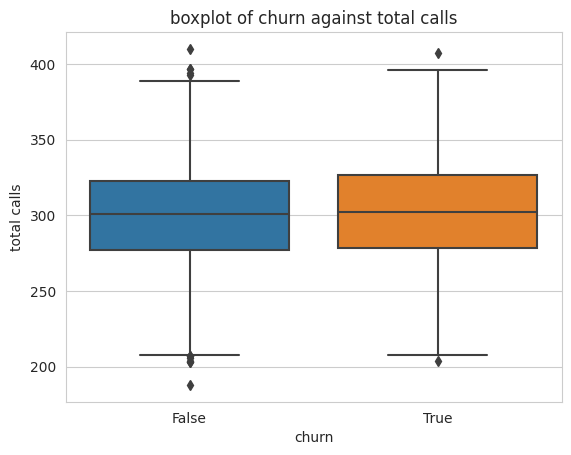

In [37]:
# total calls made against churn
sns.boxplot(x='churn', y='total calls', data=df).set(title='boxplot of churn against total calls')

In [38]:
print(f"From the above graph, both churn and unchurn customers have a slight difference in median ")

From the above graph, both churn and unchurn customers have a slight difference in median 


In [39]:
# total minutes made against churn

[Text(0.5, 1.0, 'boxplot of churn against total minutes')]

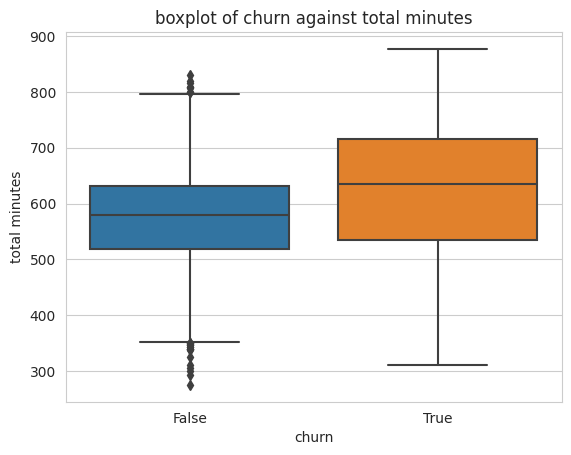

In [40]:
sns.boxplot(x='churn', y='total minutes', data=df).set(title='boxplot of churn against total minutes')

In [41]:
print(f"From the above graph, the churn customers have  a higher median total minutes as compared to the unchurn customers")

From the above graph, the churn customers have  a higher median total minutes as compared to the unchurn customers


[Text(0.5, 1.0, 'boxplot of churn against total charges')]

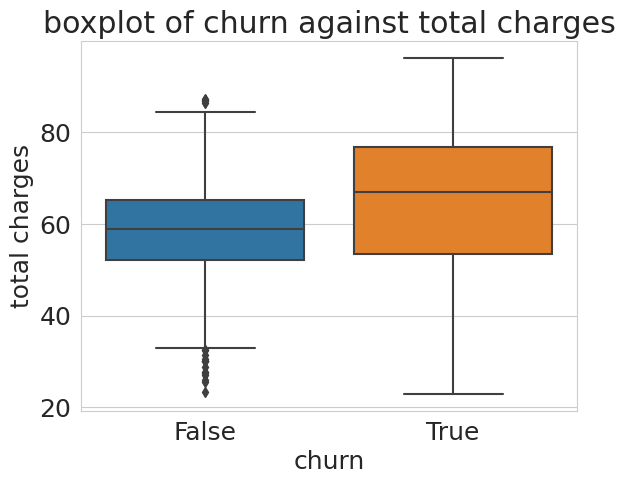

In [ ]:
# total charge against churn
sns.boxplot(x='churn', y='total charges', data=df).set(title='boxplot of churn against total charges')

In [42]:
print(f"From the above graph, the churn customers have  a higher median total charges as compared to the unchurn customers")

From the above graph, the churn customers have  a higher median total charges as compared to the unchurn customers


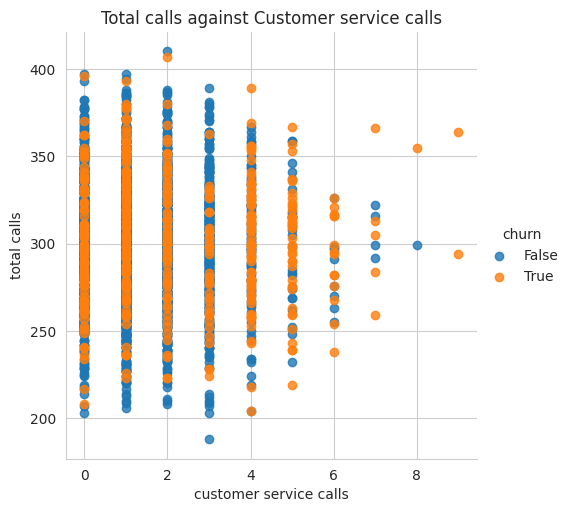

In [43]:
sns.lmplot(x='customer service calls', y='total calls', data=df, hue='churn', fit_reg=False).set(title='Total calls against Customer service calls')

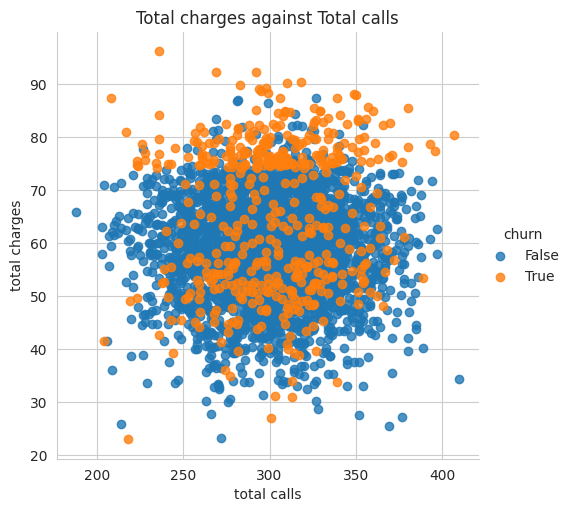

In [44]:
sns.lmplot(x='total calls', y='total charges', data=df, hue='churn', fit_reg=False).set(title='Total charges against Total calls')

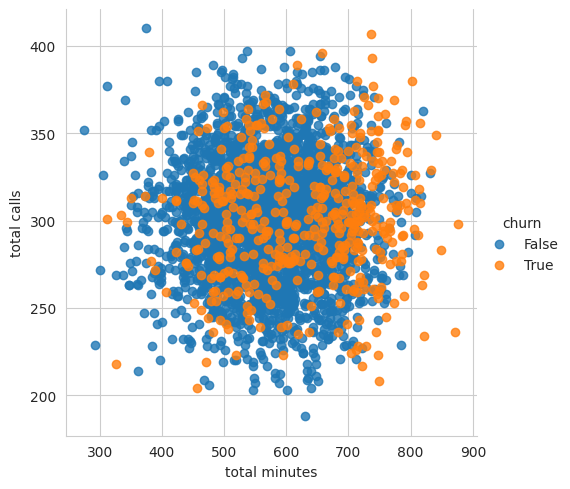

In [45]:
sns.lmplot(x='total minutes', y='total calls', data=df, hue='churn', fit_reg=False)

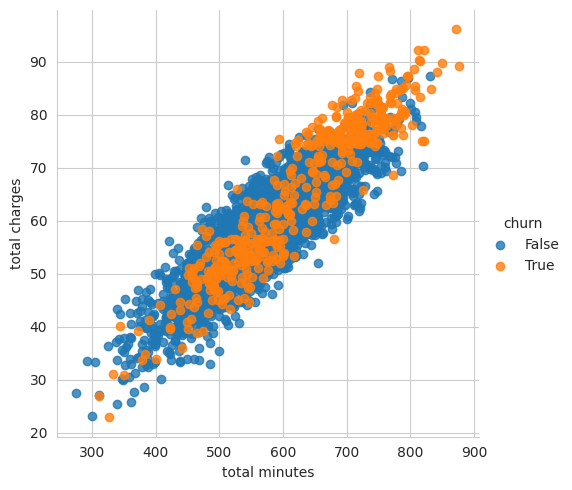

In [46]:
sns.lmplot(x='total minutes', y='total charges', data=df, hue='churn', fit_reg=False)

**Multivariate Analysis:**

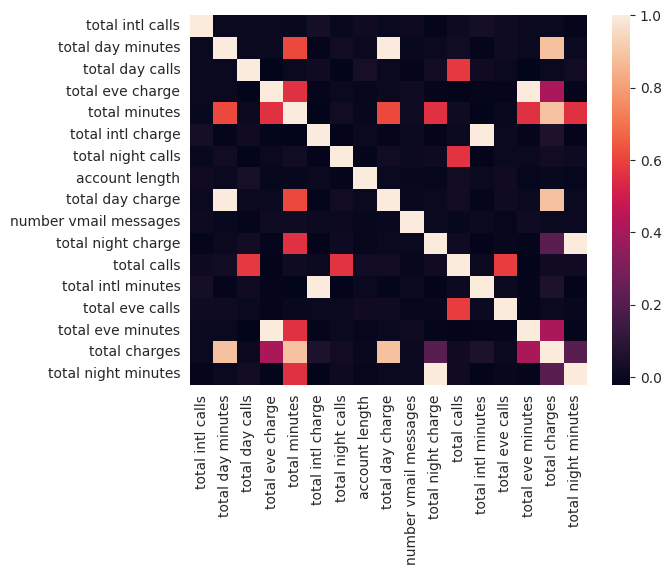

In [47]:
numerical = list(set(df.columns)-set(['state', 'international plan', 'voice mail plan','area code', 'churn', 'customer service calls']))
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix);

In [ ]:
#Checking for multicollinearity

#checking for duplicates
#Correct data types

### Data  Preprocessing and Preparation:

Dealing with Categorical variables

In [48]:
df = df.set_index('phone number')
df_updated = pd.get_dummies(df,drop_first=True,  dtype=float)

df_updated.head()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_yes,voice mail plan_yes
phone number,,,,,,,,,,,,,,,,,,,,,
382-4657,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
371-7191,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
358-1921,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
375-9999,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
330-6626,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [49]:
# Create X and y 

y = df_updated['churn']
X = df_updated.drop(['churn'], axis = 1)



**Oversampling - Working on the imbalance in target**

In [50]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=5)
X_smote, y_smote = oversample.fit_resample(X, y)

**Spliting the data with 25% test and replicative of 12:**

In [51]:
# Split into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote,y_smote, test_size=0.25, random_state=12)

In [52]:
print(f"X training data len: {len(X_train)} \nX testing data len: {len(X_test)} \ny training data len: {len(y_train)} \ny testing data len: {len(y_test)}")

X training data len: 4275 
X testing data len: 1425 
y training data len: 4275 
y testing data len: 1425


In [53]:
y_train.value_counts()

False    2163
True     2112
Name: churn, dtype: int64

In [ ]:
print(f"There are be {y_train.value_counts()[0]} values in non churn class and {y_train.value_counts()[1]} values in churn class , which means that the training dataset is now balanced.")

There are be 2163 values in non churn class and 2112 values in churn class , which means that the training dataset is now balanced.


**Scaling of the numerical data**

In [54]:
from sklearn.preprocessing import StandardScaler
# Training dataset
scaler= StandardScaler()
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_train_scaled_df = X_train
# Testing dataset
X_test[num_vars] = scaler.transform(X_test[num_vars])
X_test_scaled_df = X_test

### Modeling

In [ ]:
#specify y = df['churn'], X = df.drop(columns='churn', axis=1)
#Data splitting- train-test split from sklearn model selection
#Selecting modeling techniques
#scaling of the train data - use fit_transformer(train data)
#Generate test design
#Build Models
#Assess models

### Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression

In [123]:
LogisticR = LogisticRegression(max_iter=len(X_train_scaled_df))
LogisticR_model = LogisticR.fit(X_train_scaled_df,y_train)

In [124]:
y_pred_LG = LogisticR_model.predict(X_test_scaled_df)
y_pred_LG_train = LogisticR_model.predict(X_train_scaled_df)

Model Analysis

In [61]:
# Imporing necessary libraries
from sklearn.metrics import classification_report,roc_curve, auc,roc_auc_score,accuracy_score,confusion_matrix,ConfusionMatrixDisplay,precision_score, recall_score, f1_score

-----------------------------------------
Accuracy of the model - Testing: 0.7852631578947369
---------------------------------------------------------------------
Confusion Matrix


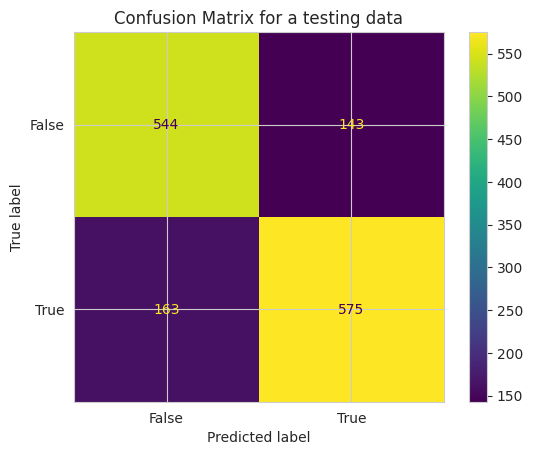

-------------------------------------------------------------------------


In [65]:
# Testing dataset
# Check the AUC of predictions
fpr, tpr, thresholds = roc_curve(y_test, y_pred_LG)
roc_auc = auc(fpr, tpr)
roc_auc
print("-----------------------------------------")
# Measuring the accuracy of the model
print(f"Accuracy of the model - Testing: {accuracy_score(y_test, y_pred_LG)}")
print("---------------------------------------------------------------------\nConfusion Matrix")
confusion_LG = confusion_matrix(y_test, y_pred_LG)
# Plotting a Confusion Matrix
visualize = ConfusionMatrixDisplay(confusion_LG, display_labels=LogisticR_model.classes_)
visualize.plot()
plt.title('Confusion Matrix for a testing data')
plt.show()
print("-------------------------------------------------------------------------")

**ROC curve and AUC**

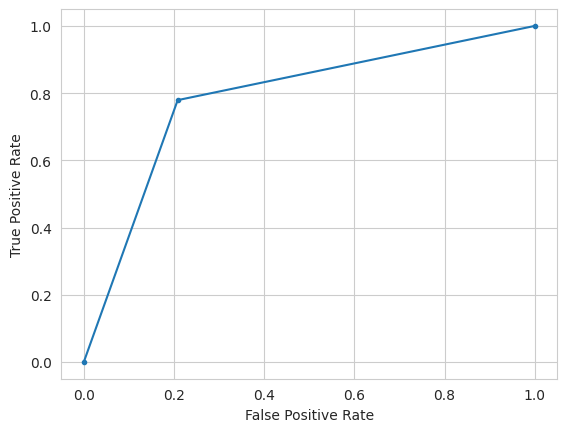

In [66]:
plt.plot(fpr, tpr, marker='.')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

-----------------------------------------
Accuracy of the model - Training: 0.8035087719298246
---------------------------------------------------------------------
Confusion Matrix


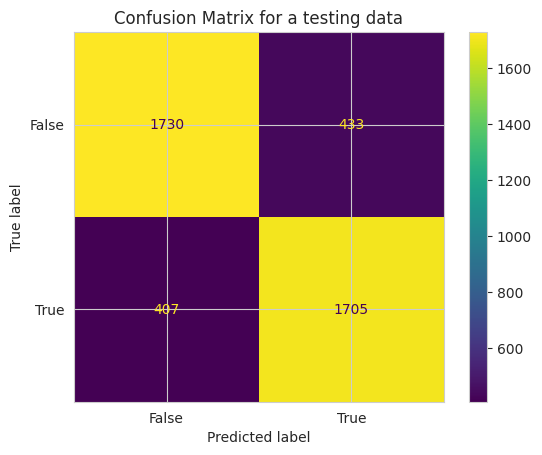

-------------------------------------------------------------------------


In [67]:
# Training dataset
# Check the AUC of predictions
fpr1, tpr1, thresholds = roc_curve(y_train, y_pred_LG_train)
roc_auc = auc(fpr1, tpr1)
roc_auc
print("-----------------------------------------")
# Measuring the accuracy of the model
print(f"Accuracy of the model - Training: {accuracy_score(y_train, y_pred_LG_train)}")
print("---------------------------------------------------------------------\nConfusion Matrix")
confusion_LG = confusion_matrix(y_train, y_pred_LG_train)
# Plotting a Confusion Matrix
visualize = ConfusionMatrixDisplay(confusion_LG, display_labels=LogisticR_model.classes_)
visualize.plot()
plt.title('Confusion Matrix for a testing data')
plt.show()
print("-------------------------------------------------------------------------")

ROC curve and AUC

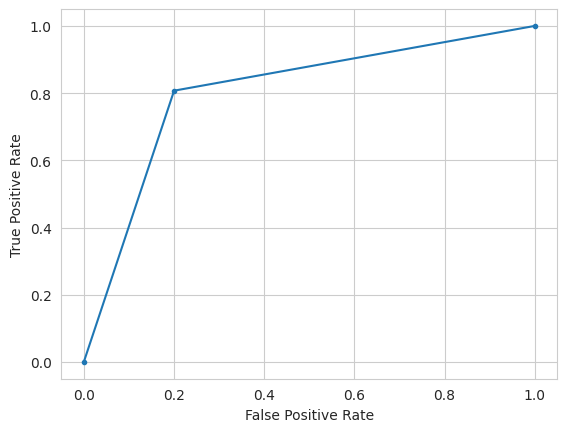

In [68]:
plt.plot(fpr1, tpr1, marker='.')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


Classification report

In [69]:
print("Classification report : Training set \n------------------------------------------------------")
print(classification_report(y_train, y_pred_LG_train))
print("Classification report : Testing set \n------------------------------------------------------")
print(classification_report(y_test, y_pred_LG))

Classification report : Training set 
------------------------------------------------------
              precision    recall  f1-score   support

       False       0.81      0.80      0.80      2163
        True       0.80      0.81      0.80      2112

    accuracy                           0.80      4275
   macro avg       0.80      0.80      0.80      4275
weighted avg       0.80      0.80      0.80      4275

Classification report : Testing set 
------------------------------------------------------
              precision    recall  f1-score   support

       False       0.77      0.79      0.78       687
        True       0.80      0.78      0.79       738

    accuracy                           0.79      1425
   macro avg       0.79      0.79      0.79      1425
weighted avg       0.79      0.79      0.79      1425



**Feature** **selections**

In [70]:
from sklearn.feature_selection import SelectFromModel
Selector = SelectFromModel(LogisticR, threshold="median")
X_train_select = Selector.transform(X_train_scaled_df)
features_select = Selector.get_support(indices = True)
features_selected = X_train_scaled_df.columns[features_select]
print(features_selected)

Index(['total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'customer service calls', 'state_AL', 'state_AZ', 'state_CA',
       'state_DE', 'state_HI', 'state_ID', 'state_IL', 'state_MA', 'state_ME',
       'state_MI', 'state_MS', 'state_MT', 'state_NJ', 'state_NM', 'state_NV',
       'state_PA', 'state_RI', 'state_SC', 'state_TX', 'state_UT', 'state_VA',
       'state_VT', 'state_WA', 'state_WY', 'international plan_yes',
       'voice mail plan_yes'],
      dtype='object')


Selecting the datasets with important features

In [71]:
X_train_feature = X_train_scaled_df[features_selected]
X_test_feature = X_test_scaled_df[features_selected]

**Re-running the model**

In [72]:
LogisticR = LogisticRegression(max_iter=len(X_train_feature))
LogisticR_model = LogisticR.fit(X_train_feature,y_train)

In [73]:
y_pred_LG = LogisticR_model.predict(X_test_feature)
y_pred_LG_train = LogisticR_model.predict(X_train_feature)

### Evaluation

For classification problems, our target is the categorical variable to count the number of times the model predicted the correct category  or something else.

**Training set**

-----------------------------------------
Accuracy of the model: 0.7780116959064327
-----------------------------------------
Precision of the mode: 0.7736470588235295
-----------------------------------------
Recall of the mode: 0.7784090909090909
-----------------------------------------
F1 Score of the mode: 0.7760207694123201
---------------------------------------------------------------------
Confusion Matrix


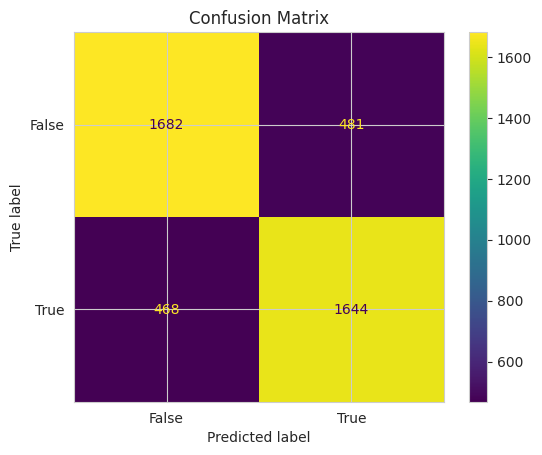

-------------------------------------------------------------------------


In [75]:
# Training set
# Check the AUC of predictions
fpr2, tpr2, thresholds = roc_curve(y_train, y_pred_LG_train)
roc_auc = auc(fpr2, tpr2)
roc_auc
print("-----------------------------------------")
# Measuring the accuracy of our model
print(f"Accuracy of the model: {accuracy_score(y_train, y_pred_LG_train)}")
print("-----------------------------------------")
# Calculate the precision
precision = precision_score(y_train, y_pred_LG_train)
print("Precision of the mode:", precision)
print("-----------------------------------------")
# Calculate the recall
recall = recall_score(y_train, y_pred_LG_train)
print("Recall of the mode:", recall)
print("-----------------------------------------")
# Calculate the f1 score
f1 = f1_score(y_train, y_pred_LG_train)
print("F1 Score of the mode:", f1)

print("---------------------------------------------------------------------\nConfusion Matrix")
confusion_LG = confusion_matrix(y_train, y_pred_LG_train)
# Plotting a Confusion Matrix
vis = ConfusionMatrixDisplay(confusion_LG, display_labels=LogisticR_model.classes_)
vis.plot()
plt.title('Confusion Matrix')
plt.show()
print("-------------------------------------------------------------------------")

In [77]:
print(f"The  testing model is performing well, with an accuracy of approximately {round(accuracy_score(y_pred_LG_train,y_train),2)} on the training dataset.")

The  testing model is performing well, with an accuracy of approximately 0.78 on the training dataset.


ROC curve and AUC

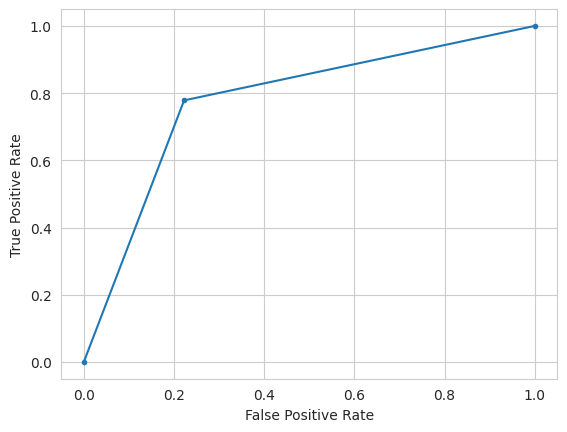

In [76]:
plt.plot(fpr2, tpr2, marker='.')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

**Training set**

-----------------------------------------
Accuracy of the model: 0.7670175438596492
-----------------------------------------
Precision of the mode: 0.7811634349030471
-----------------------------------------
Recall of the mode: 0.7642276422764228
-----------------------------------------
F1 Score of the mode: 0.7726027397260274
---------------------------------------------------------------------
Confusion Matrix


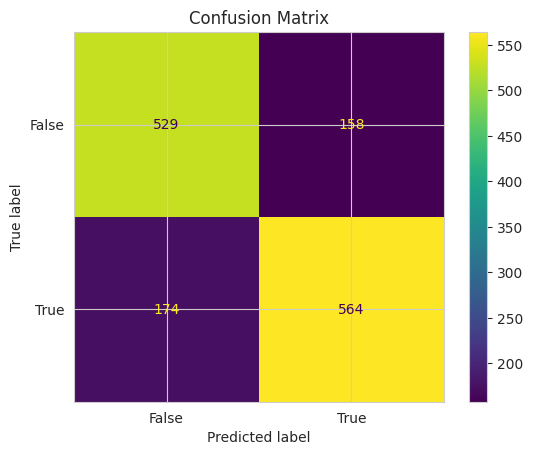

-------------------------------------------------------------------------


In [79]:
# Testing set
# Check the AUC of predictions
fpr3, tpr3, thresholds = roc_curve(y_test, y_pred_LG)
roc_auc = auc(fpr3, tpr3)
roc_auc
print("-----------------------------------------")
# Measuring the accuracy of our model
print(f"Accuracy of the model: {accuracy_score(y_test, y_pred_LG)}")
print("-----------------------------------------")
# Calculate the precision
precision = precision_score(y_test, y_pred_LG)
print("Precision of the mode:", precision)
print("-----------------------------------------")
# Calculate the recall
recall = recall_score(y_test, y_pred_LG)
print("Recall of the mode:", recall)
print("-----------------------------------------")
# Calculate the f1 score
f1 = f1_score(y_test, y_pred_LG)
print("F1 Score of the mode:", f1)

print("---------------------------------------------------------------------\nConfusion Matrix")
confusion_LG = confusion_matrix(y_test, y_pred_LG)
# Plotting a Confusion Matrix
vis = ConfusionMatrixDisplay(confusion_LG, display_labels=LogisticR_model.classes_)
vis.plot()
plt.title('Confusion Matrix')
plt.show()
print("-------------------------------------------------------------------------")

In [80]:
print(f"The  testing model is performing well, with an accuracy of approximately {round(accuracy_score(y_pred_LG,y_test),2)} on the test dataset.")

The  testing model is performing well, with an accuracy of approximately 0.77 on the test dataset.


In [ ]:
print("Classification report : Training set \n------------------------------------------------------")
print(classification_report(y_train, y_pred_LG_train))
print("Classification report : Testing set \n------------------------------------------------------")
print(classification_report(y_test, y_pred_LG))

Classification report : Training set 
------------------------------------------------------
              precision    recall  f1-score   support

       False       0.78      0.77      0.78      2163
        True       0.77      0.77      0.77      2112

    accuracy                           0.77      4275
   macro avg       0.77      0.77      0.77      4275
weighted avg       0.77      0.77      0.77      4275

Classification report : Testing set 
------------------------------------------------------
              precision    recall  f1-score   support

       False       0.76      0.76      0.76       687
        True       0.77      0.78      0.78       738

    accuracy                           0.77      1425
   macro avg       0.77      0.77      0.77      1425
weighted avg       0.77      0.77      0.77      1425



**ROC Curve and AUC**

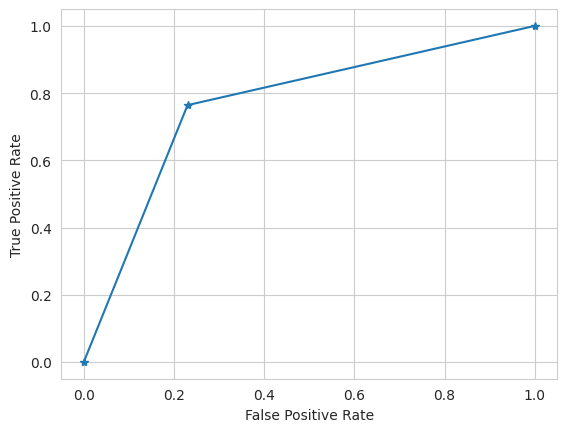

In [81]:
plt.plot(fpr3, tpr3, marker='*')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [83]:
print("From the curve above, we see that the curve comes towards the left border of the ROC space, implying the more accuracy on the test")

From the curve above, we see that the curve comes towards the left border of the ROC space, implying the more accuracy on the test


### Random Forest / Decision Tree

In [125]:
from sklearn.ensemble import RandomForestClassifier
randomf = RandomForestClassifier(random_state=12)
randomf.fit(X_train_scaled_df, y_train)

RandomForestClassifier(random_state=12)

### Evaluation

In [85]:
y_pred_RF = randomf.predict(X_test_scaled_df)
y_pred_RF_train = randomf.predict(X_train_scaled_df)

### Training set

-----------------------------------------
Accuracy of the model: 1.0
--------------------------------------------------------------------------
Confusion Matrix


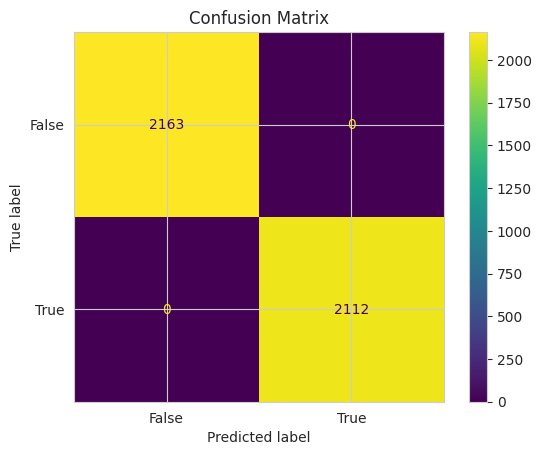

-------------------------------------------------------------------------


In [86]:
# Check the AUC of predictions
fpr4, tpr4, thresholds = roc_curve(y_train, y_pred_RF_train)
roc_auc = auc(fpr, tpr)
roc_auc
print("-----------------------------------------")
# Measuring the accuracy of our model
print(f"Accuracy of the model: {accuracy_score(y_train, y_pred_RF_train)}")
print("--------------------------------------------------------------------------\nConfusion Matrix")
confusion_RF = confusion_matrix(y_train, y_pred_RF_train)

# Plotting a Confusion Matrix
vis_RF = ConfusionMatrixDisplay(confusion_RF, display_labels=randomf.classes_)
vis_RF.plot()
plt.title('Confusion Matrix')
plt.show()
print("-------------------------------------------------------------------------")


In [87]:
print(f"The  model is performing well, with an accuracy of approximately {round(accuracy_score(y_pred_RF_train,y_train),2)} on the test dataset.")

The  model is performing well, with an accuracy of approximately 1.0 on the test dataset.


**ROC curve and AUC**

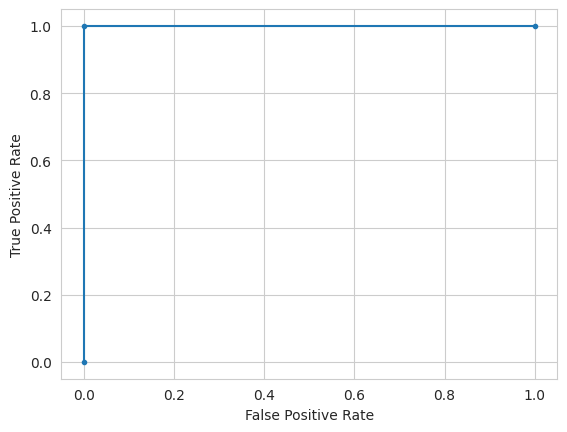

In [88]:
plt.plot(fpr4, tpr4, marker='.')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [89]:
print("From the curve above, we see that the curve follows the left part of the border, implying the more accuracy on the test")

From the curve above, we see that the curve follows the left part of the border, implying the more accuracy on the test


### Testing set

-----------------------------------------
Accuracy of the model: 0.9817543859649123
--------------------------------------------------------------------------
Confusion Matrix


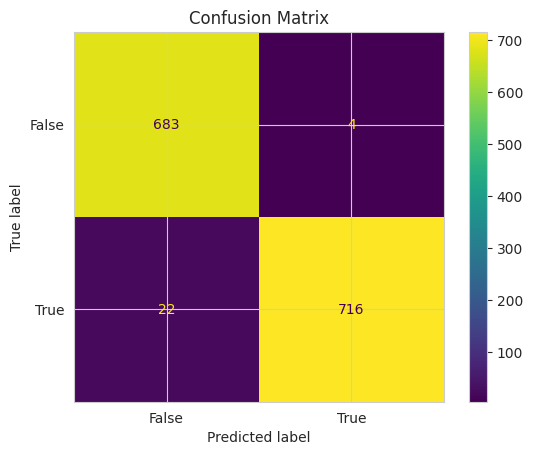

-------------------------------------------------------------------------


In [90]:
# Check the AUC of predictions
fpr5, tpr5, thresholds = roc_curve(y_test, y_pred_RF)
roc_auc = auc(fpr5, tpr5)
roc_auc
print("-----------------------------------------")
# Measuring the accuracy of our model
print(f"Accuracy of the model: {accuracy_score(y_test, y_pred_RF)}")
print("--------------------------------------------------------------------------\nConfusion Matrix")
confusion_RF = confusion_matrix(y_test, y_pred_RF)

# Plotting a Confusion Matrix
vis_RF = ConfusionMatrixDisplay(confusion_RF, display_labels=randomf.classes_)
vis_RF.plot()
plt.title('Confusion Matrix')
plt.show()
print("-------------------------------------------------------------------------")

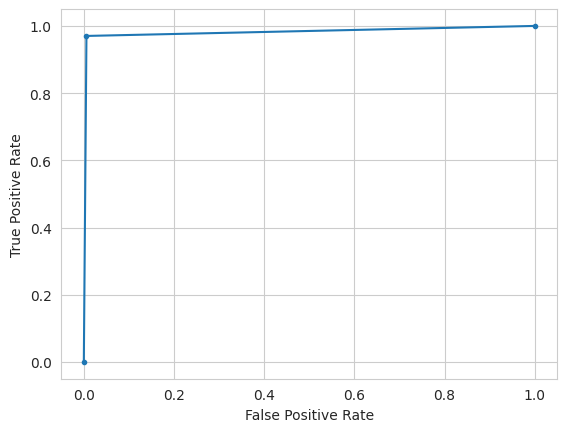

In [91]:
plt.plot(fpr5, tpr5, marker='.')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### Feature importance

In [92]:
selector1 = SelectFromModel(randomf, threshold=0.1)
selector1.fit(X_train_scaled_df, y_train)

# Get selected feature indices
selected_feature = selector1.get_support(indices=True)

# Get selected feature names
selected_features = X_train_scaled_df.columns[selected_feature]
print(selected_features)

Index(['total charges', 'international plan_yes'], dtype='object')


### Re-running the model with selected features

In [93]:
X_train_scaled_df_rf = X_train_scaled_df[selected_features]
X_test_scaled_df_rf = X_test_scaled_df[selected_features]
randomf1 = RandomForestClassifier(random_state=12)
randomf1.fit(X_train_scaled_df_rf, y_train)

RandomForestClassifier(random_state=12)

Evaluation

In [94]:
y_pred_rf = randomf1.predict(X_test_scaled_df_rf)
y_pred_train_rf = randomf1.predict(X_train_scaled_df_rf)

Training set

-----------------------------------------
Accuracy of the model: 0.9859649122807017
--------------------------------------------------------------------------
Confusion Matrix


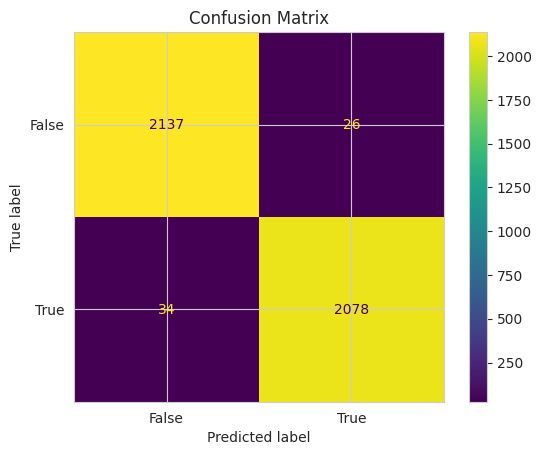

-------------------------------------------------------------------------


In [95]:
# Check the AUC of predictions
fpr6, tpr6, thresholds = roc_curve(y_train, y_pred_train_rf)
roc_auc = auc(fpr6, tpr6)
roc_auc
print("-----------------------------------------")
# Measuring the accuracy of our model
print(f"Accuracy of the model: {accuracy_score(y_train, y_pred_train_rf)}")
print("--------------------------------------------------------------------------\nConfusion Matrix")
confusion_RF = confusion_matrix(y_train, y_pred_train_rf)

# Plotting a Confusion Matrix
vis_RF = ConfusionMatrixDisplay(confusion_RF, display_labels=randomf1.classes_)
vis_RF.plot()
plt.title('Confusion Matrix')
plt.show()
print("-------------------------------------------------------------------------")

Testing set

-----------------------------------------
Accuracy of the model: 0.7733333333333333
--------------------------------------------------------------------------
Confusion Matrix


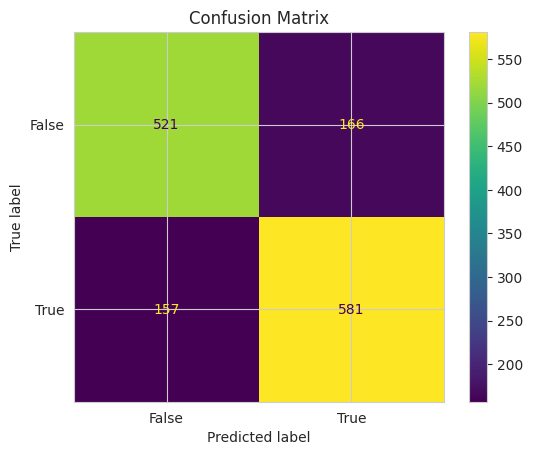

-------------------------------------------------------------------------


In [96]:
# Check the AUC of predictions
fpr7, tpr7, thresholds = roc_curve(y_test, y_pred_rf)
roc_auc = auc(fpr7, tpr7)
roc_auc
print("-----------------------------------------")
# Measuring the accuracy of our model
print(f"Accuracy of the model: {accuracy_score(y_test, y_pred_rf)}")
print("--------------------------------------------------------------------------\nConfusion Matrix")
confusion_RF = confusion_matrix(y_test, y_pred_rf)

# Plotting a Confusion Matrix
vis_RF = ConfusionMatrixDisplay(confusion_RF, display_labels=randomf1.classes_)
vis_RF.plot()
plt.title('Confusion Matrix')
plt.show()
print("-------------------------------------------------------------------------")

### With tuned hyperparameters

In [126]:
# Training the classifier using training data
from sklearn.tree import DecisionTreeClassifier
df_train = DecisionTreeClassifier(criterion='entropy', random_state=12)
df_train.fit(X_train_scaled_df, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=12)

-----------------------------------------
Accuracy of the model: 0.9621052631578947
-----------------------------------------
Precision of the mode: 0.9596774193548387
-----------------------------------------
Recall of the mode: 0.967479674796748
-----------------------------------------
F1 Score of the mode: 0.9635627530364373
-------------------------------------------------------------------------
Confusion Matrix


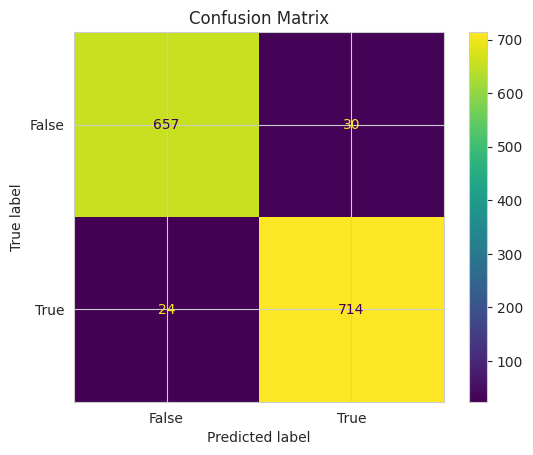

-------------------------------------------------------------------------


In [98]:
# Make predictions using test set 
y_pred = df_train.predict(X_test_scaled_df)

# Check the AUC of predictions
fpr8, tpr8, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr8, tpr8)
roc_auc
print("-----------------------------------------")
# Measuring the accuracy of our model
print(f"Accuracy of the model: {accuracy_score(y_test, y_pred)}")
print("-----------------------------------------")
# Calculate the precision
precision = precision_score(y_test, y_pred)
print("Precision of the mode:", precision)
print("-----------------------------------------")
# Calculate the recall
recall = recall_score(y_test, y_pred)
print("Recall of the mode:", recall)
print("-----------------------------------------")
# Calculate the f1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score of the mode:", f1)

print("-------------------------------------------------------------------------\nConfusion Matrix")
confusion_mat = confusion_matrix(y_test, y_pred)
vis = ConfusionMatrixDisplay(confusion_mat, display_labels=df_train.classes_)
vis.plot()
plt.title('Confusion Matrix')
plt.show()
print("-------------------------------------------------------------------------")


**ROC curve and AUC**

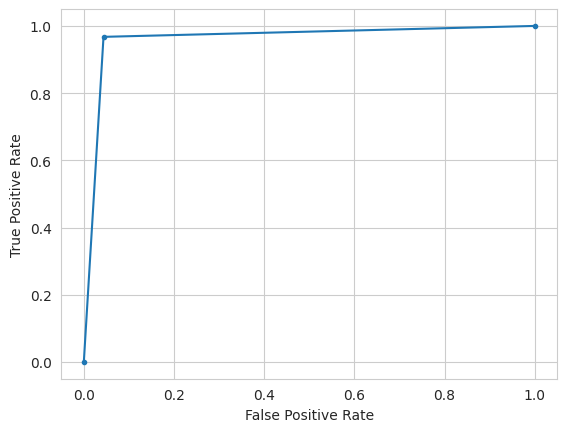

In [99]:
plt.plot(fpr8, tpr8, marker='.')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [100]:
print("From the curve above, we see that the curve follows the left part of the border, implying the more accuracy on the test")

From the curve above, we see that the curve follows the left part of the border, implying the more accuracy on the test


In [106]:
# Creating a dictionary of parameters for GridSearchCV
from sklearn.model_selection import GridSearchCV

params = {
    'criterion':  ['gini', 'entropy'],
    'max_depth':  [None,1, 4, 8, 12, 16],
    'max_features': [None, 0.2, 0.4, 0.6, 0.8],
    'splitter': ['best', 'random']
}

df_train_clf = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid=params,
    cv=5,
    n_jobs=5,
    verbose=1
)

df_train_clf.fit(X_train_scaled_df, y_train)
print(df_train_clf.best_params_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
{'criterion': 'gini', 'max_depth': 16, 'max_features': None, 'splitter': 'best'}


### Evaluation 

In [107]:
df_train_clf = DecisionTreeClassifier(max_depth = df_train_clf.best_params_['max_depth'], criterion = df_train_clf.best_params_['criterion'], max_features = df_train_clf.best_params_['max_features'], splitter = df_train_clf.best_params_['splitter'])
df_train_clf.fit(X_train_scaled_df, y_train)

DecisionTreeClassifier(max_depth=16)

In [108]:
y_pred_1 = df_train_clf.predict(X_test_scaled_df)
print(accuracy_score(y_test, y_pred_1))

0.9635087719298245


roc auc: 0.9637637424409178
-----------------------------------------
Accuracy of the model: 0.9635087719298245
-----------------------------------------
Precision of the mode: 0.9724517906336089
-----------------------------------------
Recall of the mode: 0.9566395663956639
-----------------------------------------
F1 Score of the mode: 0.9644808743169399
-----------------------------------------
Confusion Matrix


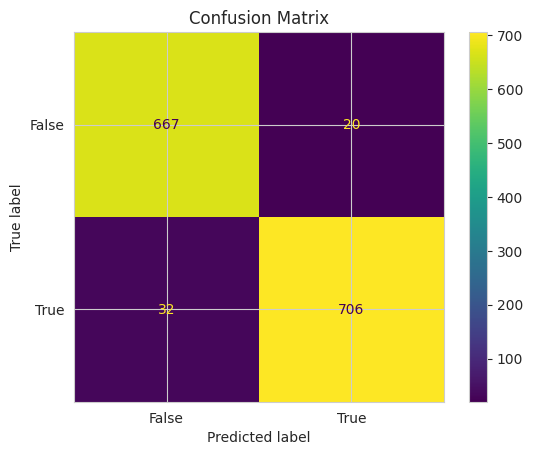

-----------------------------------------


In [109]:
# Check the AUC of predictions
fpr, tpr, thresholds = roc_curve(y_test, y_pred_1)
roc_auc = auc(fpr, tpr)
print("roc auc:",roc_auc)
print("-----------------------------------------")
# Measuring the accuracy of our model
print(f"Accuracy of the model: {accuracy_score(y_test, y_pred_1)}")
print("-----------------------------------------")
# Calculate the precision
precision = precision_score(y_test, y_pred_1)
print("Precision of the mode:", precision)
print("-----------------------------------------")
# Calculate the recall
recall = recall_score(y_test, y_pred_1)
print("Recall of the mode:", recall)
print("-----------------------------------------")
# Calculate the f1 score
f1 = f1_score(y_test, y_pred_1)
print("F1 Score of the mode:", f1)
print("-----------------------------------------\nConfusion Matrix")
confusion_matrix_clf = confusion_matrix(y_test, y_pred_1)
# Plotting a Confusion Matrix
vis_clf = ConfusionMatrixDisplay(confusion_matrix_clf, display_labels=df_train.classes_)
vis_clf.plot()
plt.title('Confusion Matrix')
plt.show()
print("-----------------------------------------")

**ROC curve and AUC**

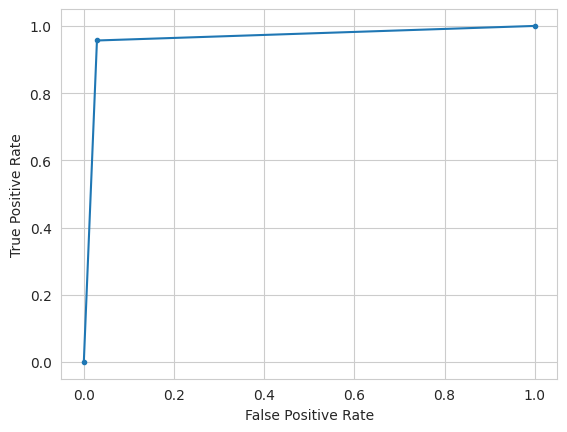

In [110]:
plt.plot(fpr, tpr, marker='.')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
print("From the curve above, we see that the curve follows the left part of the border, implying the more accuracy on the test")

### Model Testing

In [111]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

       False       0.95      0.97      0.96       687
        True       0.97      0.96      0.96       738

    accuracy                           0.96      1425
   macro avg       0.96      0.96      0.96      1425
weighted avg       0.96      0.96      0.96      1425



In [112]:
print(f"For churned customers, model achieved 0.97 precision. This means, 33% of churn customers were predicted accurately by \nthe classifier . On the other hand, 81% of the churn customers were missed by the classifier model.")

For churned customers, model achieved 0.33 precision. This means, 33% of churn customers were predicted accurately by 
the classifier . On the other hand, 81% of the churn customers were missed by the classifier model.


### **Plot of the models**

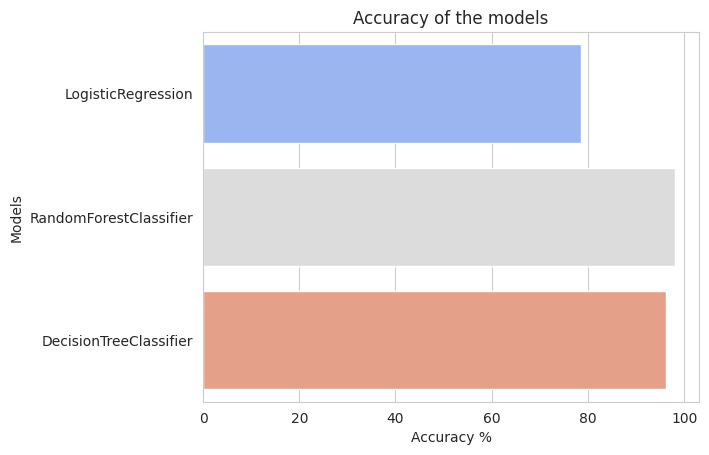

In [127]:

models = [LogisticR_model, randomf, df_train]

results = pd.DataFrame(columns=["Models", "Accuracy"])

for model in models:
    names = model.__class__.__name__  
    y_pred = model.predict(X_test_scaled_df)
    accuracy = accuracy_score(y_test, y_pred) * 100
    result = pd.DataFrame([[names, accuracy]], columns=["Models", "Accuracy"])
    results = results.append(result, ignore_index=True)

sns.barplot(x='Accuracy', y='Models', data=results, palette="coolwarm")
plt.xlabel('Accuracy %')
plt.title('Accuracy of the models')

plt.show()

### Recommendation
-Customer care agents could be trained on giving a better customer experience to reduce the churn that increases with customer service calls

-The company can invest more in terms of network and retails outlets on states that have a high churn to mitigate that

-Reward or give discounts to customers with higher total costs to prevent churn

### Conclusion
Customers are important to any business and investing on ways to mitigate churn is crucial. Syrial Tel can employ the recommended steps to mitigate churn which will inturn increase its sales. Customer service is important and can make or break a business. The customers at Syrial Tel could be calling because they already have an issue, whether they churn or not depends mostly on how they were handled. Good customer service means a better resolution and satisfaction and that will prevent a customer from churning. Customers who spend more will feel more appreciated and recognized when they are rewarded.